<a href="https://colab.research.google.com/github/vyom-verma/DL_model_cancer_prediction/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv('/content/Cancer_Data.csv')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [150]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
44,85638502,M,13.17,21.81,85.42,531.5,0.09714,0.10470,0.082590,0.05252,...,29.89,105.50,740.7,0.1503,0.3904,0.37280,0.16070,0.3693,0.09618,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,NaN
226,88147101,B,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,...,19.80,73.47,395.4,0.1341,0.1153,0.02639,0.04464,0.2615,0.08269,NaN
260,887549,M,20.31,27.06,132.90,1288.0,0.10000,0.10880,0.151900,0.09333,...,39.16,162.30,1844.0,0.1522,0.2945,0.37880,0.16970,0.3151,0.07999,NaN
131,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.08087,...,26.00,124.90,1156.0,0.1546,0.2394,0.37910,0.15140,0.2837,0.08019,NaN
462,9113156,B,14.40,26.99,92.25,646.1,0.06995,0.05223,0.034760,0.01737,...,31.98,100.40,734.6,0.1017,0.1460,0.14720,0.05563,0.2345,0.06464,NaN
320,894604,B,10.25,16.18,66.52,324.2,0.10610,0.11110,0.067260,0.03965,...,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702,NaN
390,90317302,B,10.26,12.22,65.75,321.6,0.09996,0.07542,0.019230,0.01968,...,15.65,73.23,394.5,0.1343,0.1650,0.08615,0.06696,0.2937,0.07722,NaN
376,901315,B,10.57,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.05941,...,22.82,76.51,351.9,0.1143,0.3619,0.60300,0.14650,0.2597,0.12000,NaN
189,874839,B,12.30,15.90,78.83,463.7,0.08080,0.07253,0.038440,0.01654,...,19.59,86.65,546.7,0.1096,0.1650,0.14230,0.04815,0.2482,0.06306,NaN


In [151]:
X=df.drop(columns=['id','diagnosis','Unnamed: 32'])
y=df['diagnosis']
X.shape




(569, 30)

In [152]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)


LabelEncoder()

In [153]:
y=le.transform(y)

In [154]:
y=pd.DataFrame(y)
y.sample(10)

,0
48,0
503,1
568,0
486,0
480,0
234,0
113,0
309,0
164,1
101,0


In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [156]:
X_train


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
31,11.84,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,0.07799,...,16.82,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.19090,0.26980,0.40230,0.14240,0.2964,0.09606
90,14.62,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.02957,0.1685,0.05866,...,16.11,29.11,102.90,803.7,0.11150,0.17660,0.09189,0.06946,0.2522,0.07246
429,12.72,17.67,80.98,501.3,0.07896,0.04522,0.01402,0.01835,0.1459,0.05544,...,13.82,20.96,88.87,586.8,0.10680,0.09605,0.03469,0.03612,0.2165,0.06025
417,15.50,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.08481,0.2085,0.06864,...,23.17,27.65,157.10,1748.0,0.15170,0.40020,0.42110,0.21340,0.3003,0.10480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.08795,0.2132,0.06022,...,22.93,27.68,152.20,1603.0,0.13980,0.20890,0.31570,0.16420,0.3695,0.08579
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771
83,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
394,12.10,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.03326,0.1937,0.06161,...,13.56,25.80,88.33,559.5,0.14320,0.17730,0.16030,0.06266,0.3049,0.07081


In [157]:
X_test.shape

(114, 30)

In [158]:
y_test.shape

(114, 1)

In [159]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [160]:
X_train_scaled

array([[-0.61782354, -0.11639393, -0.54671691, ...,  0.60997221,
         2.93053104,  3.06022506],
       [-0.87059577,  0.49957333, -0.79503372, ...,  0.42835439,
         0.08720527,  0.64576951],
       [ 0.17173469,  1.12018941,  0.13852216, ..., -0.65748201,
        -0.61215477, -0.64514918],
       ...,
       [ 1.44411629,  1.64782929,  1.56047559, ...,  1.04913007,
        -0.94601216,  0.42532874],
       [-0.54397996, -0.3441856 , -0.54095168, ..., -0.75871162,
         0.22169758, -0.73540409],
       [ 0.27681978,  1.39446917,  0.17846698, ..., -1.25994704,
        -2.12638001, -1.59802221]])

In [161]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [162]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=30))
model.add(Dropout(0.4))
model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [163]:
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                310       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 88        
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 407
Trainable params: 407
Non-trainable params: 0
_________________________________________________________________


In [164]:
history=model.fit(X_train_scaled,y_train,epochs=25, verbose=False, validation_data=(X_test_scaled,y_test) ,batch_size=32)

In [165]:
y_log=model.predict(X_test_scaled)


4/4 [==============================] - 0s 3ms/step


In [166]:
y_pred=np.where(y_log>0.5,1,0)
y_pred=pd.DataFrame(y_pred)

In [167]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9649122807017544

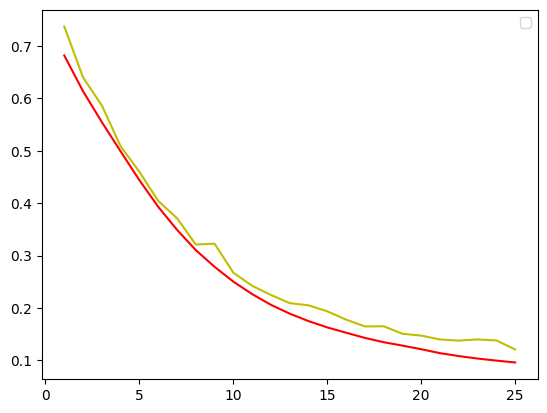

In [168]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'y')
plt.plot(epochs,val_loss,'r')
plt.legend()


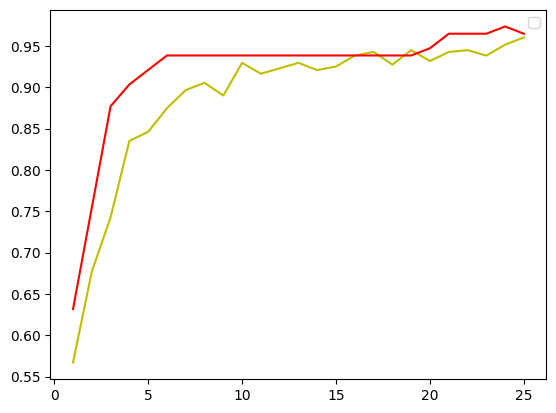

In [169]:
import matplotlib.pyplot as plt
a=history.history['accuracy']
val_a=history.history['val_accuracy']
epochs=range(1,len(loss)+1)

plt.plot(epochs,a,'y')
plt.plot(epochs,val_a,'r')
plt.legend()


In [170]:

df=df.sample(100)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
347,89869,B,14.76,14.74,94.87,668.7,0.08875,0.07780,0.046080,0.035280,...,17.93,114.20,880.8,0.12200,0.20090,0.21510,0.12510,0.3109,0.08187,NaN
77,8610637,M,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.168400,0.108000,...,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,NaN
334,897374,B,12.30,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,...,28.46,84.53,544.3,0.12220,0.09052,0.03619,0.03983,0.2554,0.07207,NaN
408,90524101,M,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,...,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503,NaN
413,905557,B,14.99,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,...,31.55,110.20,867.1,0.10770,0.33450,0.31140,0.13080,0.3163,0.09251,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,88725602,M,15.53,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,...,49.54,126.30,1035.0,0.18830,0.55640,0.57030,0.20140,0.3512,0.12040,NaN
367,9011495,B,12.21,18.02,78.31,458.4,0.09231,0.07175,0.043920,0.020270,...,24.04,93.85,624.6,0.13680,0.21700,0.24130,0.08829,0.3218,0.07470,NaN
454,911202,B,12.62,17.15,80.62,492.9,0.08583,0.05430,0.029660,0.022720,...,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330,NaN
218,8811842,M,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.127200,0.086910,...,28.64,170.30,2009.0,0.13530,0.32350,0.36170,0.18200,0.3070,0.08255,NaN


In [171]:
a=df.drop(columns=['id','diagnosis','Unnamed: 32'])
b=df['diagnosis']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(b)
b=le.transform(b)
b=pd.DataFrame(b)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
a=scaler.fit_transform(a)




4/4 [==============================] - 0s 2ms/step


<ipython-input-172-643330a14a66>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(b_test)


<Axes: ylabel='Density'>

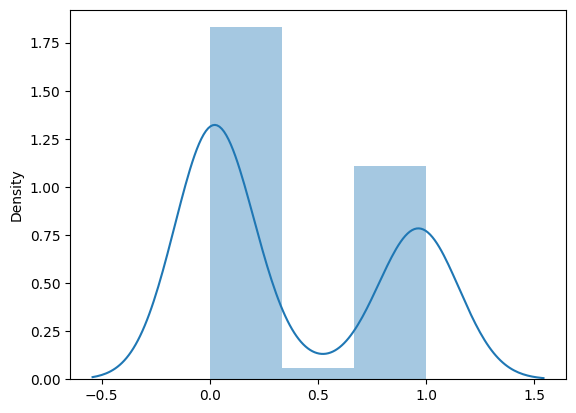

In [172]:
b_test=model.predict(a)
b_test
import seaborn as sns
sns.distplot(b_test)

In [173]:
b_test=np.where(b_test>0.5,1,0)
b_test=pd.DataFrame(b_test)

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(b,b_test  )

1.0